Point1:  (229.03192138671875, 187.7620086669922)
Point2:  (121.73657989501953, 20.486282348632812)
---------------------------
Point1:  (320.54632568359375, 190.82855224609375)
Point2:  (119.34600067138672, 100.23937225341797)
---------------------------
Point1:  (345.50408935546875, 257.9349670410156)
Point2:  (60.5489387512207, 121.88700103759766)
---------------------------
Point1:  (336.1231384277344, 295.5732421875)
Point2:  (27.45018196105957, 114.22132873535156)
---------------------------
Point1:  (354.98150634765625, 310.3795166015625)
Point2:  (14.623296737670898, 130.60916137695312)
---------------------------
Point1:  (327.3328857421875, 193.5652618408203)
Point2:  (116.23074340820312, 106.02965545654297)
---------------------------
Point1:  (304.64923095703125, 193.8992919921875)
Point2:  (116.193115234375, 86.23214721679688)
---------------------------
Point1:  (318.8157653808594, 203.18820190429688)
Point2:  (108.51056671142578, 98.9063491821289)
------------------------

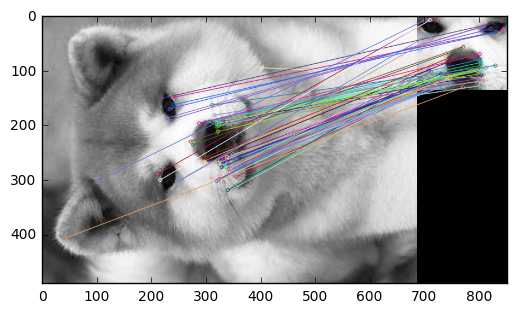

(<matplotlib.image.AxesImage at 0x7f1e6a520b70>, None)

In [2]:
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('Akita-inu.png', 0)  # queryImage
img2 = cv2.imread('akita-mini.PNG', 0)  # trainImage


# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good.append([m])

for dmatch in good:
    point1 = kp1[dmatch[0].queryIdx].pt
    point2 = kp2[dmatch[0].trainIdx].pt
    print('Point1: ',point1)
    print('Point2: ',point2)
    print('---------------------------')

img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, 4, flags=2)
plt.imshow(img3), plt.show()

